In [1]:
# importar librerías

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Libreria Regex para buscar patrones
# -----------------------------------------------------------------------
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Ajusta el ancho de la consola para evitar truncamientos
# -----------------------------------------------------------------------
pd.set_option("display.width", 1000) 

# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
from scipy.stats import levene
from scipy.stats import chi2_contingency, ttest_ind


# Importar otras librerías para manipulación y análisis de datos
# -----------------------------------------------------------------------
import csv

In [2]:
df_HR= pd.read_csv("Dataset_HR_final.csv")
df_HR.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work
0,51,No,Unknown,684.0,Research & Development,6,3,Other,1,162.0,1,Male,51.0,3,5,Research Director,3,Unknown,1628.08,6462,7,No,13,3,3,40,0,11.25,5,3.00,20,15,15,1972,19537.0,Yes
1,52,No,Unknown,699.0,Research & Development,1,4,Life Sciences,1,259.0,3,Male,65.0,2,5,Manager,3,Unknown,1666.58,5678,0,No,14,3,1,40,1,34.00,5,3.00,33,11,9,1971,19999.0,Yes
2,42,No,travel rarely,532.0,Research & Development,4,2,Technical Degree,1,319.0,3,Male,58.0,3,5,Manager,4,Married,1602.67,4933,1,No,11,3,4,40,0,22.00,3,2.77,22,11,15,1981,19232.0,Yes
3,47,No,travel rarely,359.0,Research & Development,2,4,Medical,1,1462.0,1,Female,82.0,3,4,Research Director,3,Married,1430.75,26703,3,No,19,3,2,40,2,11.25,2,2.77,20,5,6,1976,17169.0,No
4,48,No,Unknown,117.0,Research & Development,22,3,Medical,1,1900.0,4,Female,58.0,3,4,Manager,4,Unknown,1431.17,2437,3,No,11,3,2,40,1,11.25,3,3.00,22,4,7,1975,17174.0,Yes


### Matriz de correlaciones


1. **Correlación Débil**:

   - El valor absoluto del coeficiente de correlación está cerca de 0.

   - Por lo general, se considera una correlación débil si el valor absoluto está por debajo de 0.3.

2. **Correlación Moderada**:

   - El valor absoluto del coeficiente de correlación está en el rango de 0.3 a 0.7.

   - Se considera una correlación moderada si el valor absoluto está en este rango.

3. **Correlación Fuerte**:

   - El valor absoluto del coeficiente de correlación es igual o superior a 0.7.

   - Se considera una correlación fuerte si el valor absoluto está en este rango.

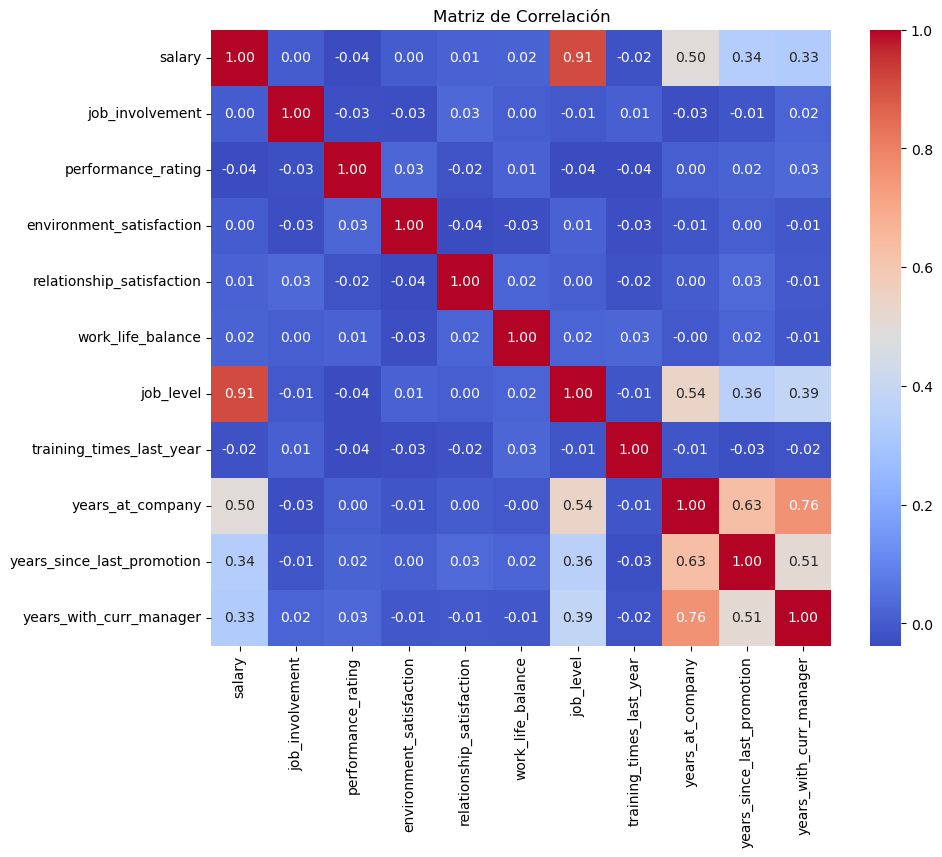

In [8]:
# FILTRAR COLUMNAS DE INTERÉS
columnas_interes=["salary","job_involvement","performance_rating","environment_satisfaction" ,"relationship_satisfaction" ,"work_life_balance",
    "job_level" ,
    "training_times_last_year",
    "years_at_company",
    "years_since_last_promotion",
    "years_with_curr_manager"]
correlacion_matrix = df_HR[columnas_interes].corr()

# Visualizar la matriz de correlación con tamaño ajustado
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
sns.heatmap(correlacion_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


Tener en cuenta en el proceso de análisis:

- Aportar información al cliente sobre como `reducir la rotación de empleados y mejorar la satisfacción en el trabajo la empresa ABC Corporation`

- Recomendaciones para la empresa en función de los resultados encontrados con las gráficas

**Paula**
1. ¿Las personas que se van de la empresa están relacionadas con la edad?
2. ¿El tipo de rol influye entre el equilibiro de trabajo y vida personal?

**Andrea**

3. ¿Cantidad de trabajadores que hacen horas extras?- Determinar si en la cultura de trabajo de la empresa es trabajar muchas horas extras y si esto afecta la satisfacción del trabajador
   4. ¿ esto tiene una relación con el nivel de satisfacción del empleado?

9. ¿ cuantas personas han tenido alguna promoción de su puesto actual? years_since_last_promotion

**Maria**

5. Relación entre nivel job_satisfaction con work_life_balance

6. Relación entre training_times_last_year con job_satisfaction

7. relacion entre salary y nivel job_satisfactio

8. Relación entre remote_work y  work_life_balance

